In [1]:
#importing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from functions import (maxwE)

import matplotlib as mpl
Paper_style = json.load(open("Paperstyle.json",'r'))
mpl.style.use(Paper_style)

sigma_0 = 0.5
sigma_max= 2.9

In [2]:
def is_main_module():
    """
    Returns whether this notebook is the main module
    ie not being run from another notebook
    """
    return __name__ == '__main__' and '__file__' not in globals()

In [6]:
#plot functions
def subs(Nsub = 1):
    
    fig, axarr = plt.subplots(1,Nsub,figsize = (Nsub*4,3))

    if Nsub == 1:
        axarr = [axarr]
        
    return fig, axarr

def axLabels(ax,title,xlabel,ylabel):
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

In [7]:
def sig_lin(eps, epsstar):
    sigma_0 = 0.578
    s = sigma_0 + (1-sigma_0)*eps/epsstar
    s[s > sigma_max] = sigma_max
    return s

def sig_vau(eps, epsstar):
    wmax = 500
    w0 = 12
    ks = 1
    k = np.ones_like(eps)*0.62
    k[eps > wmax] = 0.25
    v = (eps - w0)/(wmax - w0)
    
    s = sigma_max * (v*np.exp(1-v))**k
    
    return s

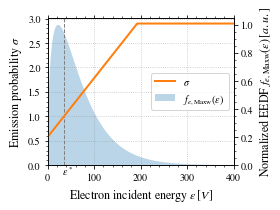

In [11]:
#plot SEE models
def plot_SEE_model():
    fig, axarr = subs(Nsub = 1)

    xmin, xmax = 0,400
    ymin, ymax = 0,3
    e = np.linspace(xmin, xmax,int(xmax))
    epsstar = 35
    ax = axarr[0]
    ax.plot(e[0],sig_lin(e,epsstar)[0], )
    ax.plot(e,sig_lin(e,epsstar), label = "$\\sigma$")
    # ax.plot(e,sig_vau(e,epsstar), label = "Vaughan model")


    ax.text(epsstar*0.9,-0.2,r"$\epsilon^*$")

    ax2 = ax.twinx()
    ax2.grid(False)
    ax2.set_ylabel("Normalized EEDF $f_{e,\\rm Maxw}(\epsilon) \\/ [a.u.] $")

    fe = maxwE(e,45/2, False)
    ax2.fill(e,fe/fe.max(), alpha = 0.3, label = "$f_{e,\\rm Maxw}(\epsilon) $", zorder = 5)

    # Legend order
    ax.set_zorder(ax2.get_zorder()+1)    #put the first axis on top in order to have the legend on top
    ax.patch.set_visible(False)          # hide the 'canvas' to make the 

    title = "" #"SEE probalility with $\epsilon$"
    ylabel = "Emission probability $\sigma$ "
    xlabel = "Electron incident energy $\epsilon\/ [V]$"
    axLabels(ax,title,xlabel,ylabel)

    #only one legend with the maxwellian legend:
    if True:
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        l = ax.legend(h1+h2, l1+l2, loc = 'center right' )
    else:
        l = ax.legend(loc = 'center right' )
    l.set_zorder(2)  # put the legend on top

    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin =0)
    ax2.set_ylim(ymin =0)
    Ymin, Ymax = ax.get_ylim()
    ax.vlines(epsstar,Ymin,Ymax, linestyles="--", colors='gray', linewidth = 1)

plot_SEE_model()
plt.savefig("../SEE_models.pdf")

In [13]:
def get_data(fname):

    SeeV = np.loadtxt(fname,dtype=np.str, delimiter=";")
    SeeV = np.char.replace(SeeV,',','.').astype(np.float64)
    
    return SeeV[:,0], SeeV[:,1]

In [14]:
TV, SeeV =  get_data("Vaughan-SEE2.csv")
TS, SeeS =  get_data("Sminov-SEE.csv")

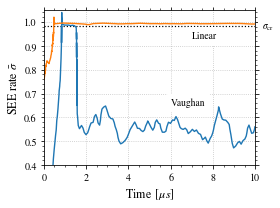

In [18]:
#ploting
fig = plt.figure(figsize=(4,3))

plt.plot(TV,SeeV, label = "SEE rate: Vaughan",linewidth=1.4)
plt.plot(TS,SeeS, label = "SEE rate: Smirnov",linewidth=1.4)

text_size = 9.5
kwargs = {"size":text_size, "backgroundcolor":"w" }

plt.text(6,0.65,'Vaughan', **kwargs)
plt.text(10.3,0.97,r'$\sigma_{\rm cr}$', **kwargs)
plt.text(7,0.93,'Linear', **kwargs)

plt.ylim(ymin = 0.4, ymax=1.05)
plt.xlim(0,10)

#plt.hlines(1,0,10, linewidth=1.2, linestyles=":")
plt.hlines(0.983,0,10, linewidth=1.2, linestyles=":")
plt.ylabel(r"SEE rate $\bar{\sigma}$")
plt.xlabel("Time $ \/ [\mu s]$")
plt.savefig('../SEE_models_comparaison.pdf',bbox_inches="tight")